In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ammarufr","key":"39d611022241bebf409f954ac9cbc2cc"}'}

In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [7]:
!kaggle datasets download -d nirmalsankalana/crop-pest-and-disease-detection
!unzip -q crop-pest-and-disease-detection.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/crop-pest-and-disease-detection
License(s): CC0-1.0
100% 1.24G/1.25G [00:07<00:00, 128MB/s] 
100% 1.25G/1.25G [00:07<00:00, 178MB/s]


In [8]:
classes = ['Cashew anthracnose', 'Cashew healthy', 'Cashew leaf miner', 'Cashew red rust']
base_path = 'dataset'
split_base = 'split_dataset'
splits = ['train', 'val', 'test']
split_ratio = {'train': 0.8, 'val': 0.1, 'test': 0.1}

# Buat folder split
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(split_base, split, cls), exist_ok=True)

# Proses pembagian data
for cls in classes:
    src_dir = os.path.join(base_path, cls)
    all_images = [os.path.join(src_dir, img) for img in os.listdir(src_dir)]
    random.shuffle(all_images)
    total = len(all_images)
    train_end = int(split_ratio['train'] * total)
    val_end = train_end + int(split_ratio['val'] * total)

    split_data = {
        'train': all_images[:train_end],
        'val': all_images[train_end:val_end],
        'test': all_images[val_end:]
    }

    for split in splits:
        for img_path in split_data[split]:
            shutil.copy(img_path, os.path.join(split_base, split, cls, os.path.basename(img_path)))

print("Selesai membagi dataset ke split_dataset/")

Selesai membagi dataset ke split_dataset/


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

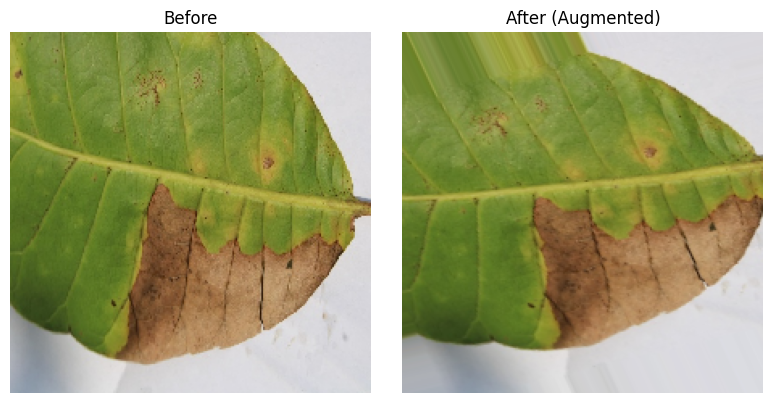

In [14]:
def show_before_after(img_path, datagen, target_size=(224, 224)):
    original_img = load_img(img_path, target_size=target_size)
    original_array = img_to_array(original_img)
    img_batch = np.expand_dims(original_array, axis=0)
    augmented_iter = datagen.flow(img_batch, batch_size=1, shuffle=False)
    augmented_img = next(augmented_iter)[0]
    original_display = original_array / 255.0

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_display)
    plt.title("Before")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_img)
    plt.title("After (Augmented)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Pilih gambar acak dari salah satu kelas
sample_class = 'Cashew anthracnose'
sample_dir = 'split_dataset/train/' + sample_class
sample_img = random.choice(os.listdir(sample_dir))
sample_img_path = os.path.join(sample_dir, sample_img)

show_before_after(sample_img_path, train_datagen, target_size=(224, 224))